# Introduction to the Z-Transform
This notebook provides an intuitive introduction to the Z-transform. We connect it to familiar concepts like sampling, Fourier, and Laplace transforms, and show how it helps analyze discrete-time systems.

## 1. From Continuous to Discrete
In the **continuous world**, signals are functions of time $x(t)$. To process them digitally, we **sample** at intervals $T_s$:

$$
x[n] = x(nT_s)
$$

After sampling, the dynamics of discrete systems are governed by **difference equations** in the integer index $n$. Solving these directly in the time domain is often complicated, which motivates the need for new tools such as the **Z-transform** to analyze and design discrete-time signals and systems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def sampling_demo(fs=20):
    t = np.linspace(0, 1, 1000)
    x_cont = np.sin(2*np.pi*5*t)
    n = np.arange(0, 1, 1/fs)
    x_disc = np.sin(2*np.pi*5*n)
    
    plt.figure(figsize=(8,4))
    plt.plot(t, x_cont, label='Continuous x(t)')
    plt.stem(n, x_disc, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sampled x[n]')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(f'Sampling at {fs} Hz')
    plt.legend()
    plt.grid()
    plt.show()

interact(sampling_demo, fs=IntSlider(min=5, max=100, step=1, value=20))

interactive(children=(IntSlider(value=20, description='fs', min=5), Output()), _dom_classes=('widget-interact'…

<function __main__.sampling_demo(fs=20)>

#### Exercise 1.1
Try different sampling rates in the interactive demo.
- At what minimum frequency does aliasing appear for a 5 Hz sine?
- How does the sampled signal change if you reduce fs close to the signal frequency?

#### Answer
When the sampling rate is 5 Hz, all samples fall at the same phase, so the signal looks like a flat line - the information is completely lost.

At slightly higher rates (for example 6 Hz), aliasing appears: the signal still looks like a sine wave, but with the wrong, lower frequency.

At 10 Hz, the samples just alternate between positive and negative peaks.
This means the frequency is still correct, but the waveform cannot be reconstructed because there are not enough points per period.

## 2. Family of Integral Transforms
Integral transforms are necessary in signals and systems because they convert complex differential or difference equations in the time domain into simpler algebraic forms in a transform domain, making analysis and design much easier.  
Different transforms belong to the same family of tools to analyze signals:

- **Fourier Transform**: represents signals as sums of sines/cosines. Good for steady-state frequency analysis.
    > Instead of working with time samples directly, we represent signals in terms of sinusoidal base functions. This gives a frequency-domain picture but does not handle transients.
- **Laplace Transform**: extends continuous-time Fourier with decaying/growing exponentials $e^{(-\sigma + j\omega)t}$ to capture **transients**. Laplace transform is essential in control systems and higher frequency analog/RF electronics.
    > Instead of plugging in time values into differential equations, we move to the Laplace domain, where functions are represented using exponential base functions $e^{-st}$. This turns the **differential equation into an algebraic equation** in $s$
- **Z-Transform**: the discrete-time version of Laplace, with $z = r e^{j\omega}$ where $r$ is the radius and $\omega$ is the frequency angle. Z-transform in essential for digital control systems and digital signal processing (DSP) including digital filters.
    > Instead of plugging in sampled data into difference equations in the time domain, we move to the Z-domain, where the sequence is represented using exponential base sequences $z^{-n}$. This turns the **difference equation into an algebraic equation** in $z$.”


In [2]:
def transient_demo(r=0.9, freq=0.2):
    n = np.arange(0, 50)
    signal = (r**n) * np.cos(2*np.pi*freq*n)
    plt.figure(figsize=(6,3))
    plt.stem(n, signal, basefmt=" ")
    plt.title(f'Transient demo z-domain params: r={r}, freq={freq} cycles/sample')
    plt.xlabel('n (samples)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

interact(transient_demo, r=(0.5, 1.2, 0.1), freq=(0.05, 0.45, 0.05))

interactive(children=(FloatSlider(value=0.9, description='r', max=1.2, min=0.5), FloatSlider(value=0.2, descri…

<function __main__.transient_demo(r=0.9, freq=0.2)>

#### Exercise 2.1
Assume you fix the r value to be constant. Which is the constant value that gives continuous sinusoidal waveforms i.e. corresponds to base waveforms used in Fourier transform?

#### Answer
The constant value is r = 1,
because it gives a continuous sinusoidal waveform with constant amplitude,
just like the base waveforms used in the Fourier transform.

## 3. From Time Domain Equations to Z-Domain

Instead of signals, we focus on **system** behavior. A system takes some **input $x[n]$** and produces **output $y[n]$**.  
Consider a simple system defined in the **time domain**:

$$
y[n] = x[n] + x[n-1]
$$

This just adds the current and previous sample (a moving average). How to know how this performs in frequency domain? Use z-transform:  

The Z-transform rule is:

$$
\mathcal{Z}\{x[n-k]\} = z^{-k} X(z)
$$

Taking the Z-transform of both sides:

$$
Y(z) = X(z) + z^{-1} X(z)
$$

So the **transfer function** is (written as polynom of $z^{-1}$):

$$
H(z) = \frac{Y(z)}{X(z)} = 1 + z^{-1}
$$

> A **transfer function** describes how a system transforms an input signal into an output signal.  
> It is the ratio of the **output** to the **input** in the transform domain (here, the $z$-domain):
> $$
> H(z) = \frac{Y(z)}{X(z)}
> $$
> where  
> - $X(z)$ is the $z$-transform of the input $x[n]$,  
> - $Y(z)$ is the $z$-transform of the output $y[n]$,  
> - $H(z)$ is the transfer function.

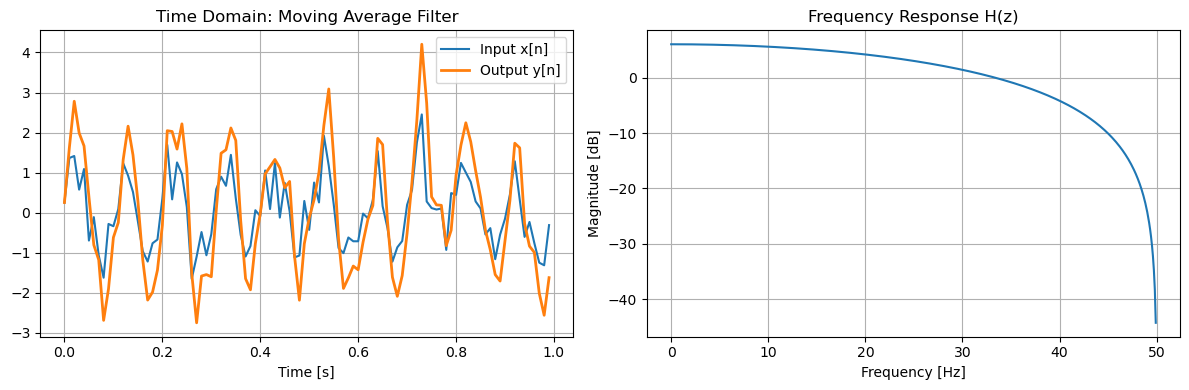

In [3]:
import scipy.signal as signal

# Moving average filter coefficients
b = [1, 1]  # numerator
a = [1]     # denominator

# Simulate noisy sine through filter
fs = 100
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))
y = signal.lfilter(b, a, x)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t, x, label='Input x[n]')
plt.plot(t, y, label='Output y[n]', linewidth=2)
plt.title('Time Domain: Moving Average Filter')
plt.xlabel('Time [s]')
plt.legend(); plt.grid()

# Frequency response
w, h = signal.freqz(b, a, worN=512)
plt.subplot(1,2,2)
plt.plot(w/np.pi*fs/2, 20*np.log10(np.abs(h)))
plt.title('Frequency Response H(z)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.tight_layout()
plt.show()

### Exercise 3.1

Previous code example filters and has gain (when you average two values, you have to divide the sum by 2. That factor missing.) Fix the example.

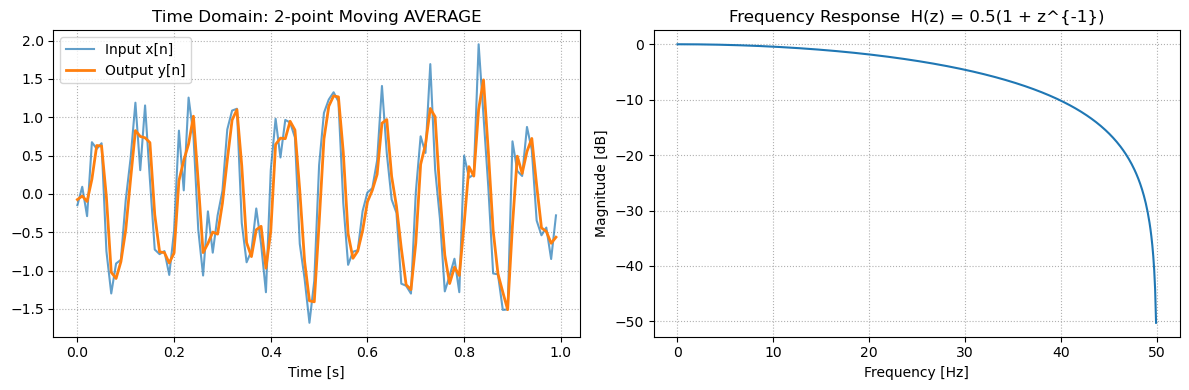

DC gain: 0.00 dB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Moving average (normalized): y[n] = 0.5*x[n] + 0.5*x[n-1]
b = [0.5, 0.5]   # numerator (average, not sum)
a = [1.0]        # denominator

# Simulate noisy sine through filter
fs = 100
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))
y = signal.lfilter(b, a, x)

plt.figure(figsize=(12,4))

# Time domain
plt.subplot(1,2,1)
plt.plot(t, x, label='Input x[n]', alpha=0.7)
plt.plot(t, y, label='Output y[n]', linewidth=2)
plt.title('Time Domain: 2-point Moving AVERAGE')
plt.xlabel('Time [s]')
plt.legend(); plt.grid(True, linestyle=':')

# Frequency response
w, h = signal.freqz(b, a, worN=512)
f = (w/(2*np.pi))*fs
mag_db = 20*np.log10(np.maximum(np.abs(h), 1e-12))
plt.subplot(1,2,2)
plt.plot(f, mag_db)
plt.title('Frequency Response  H(z) = 0.5(1 + z^{-1})')
plt.xlabel('Frequency [Hz]'); 
plt.ylabel('Magnitude [dB]')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# DC gain
dc_gain_db = 20*np.log10(np.abs(h[0]))
print(f"DC gain: {dc_gain_db:.2f} dB")

### Exercise 3.2

Previous code example filters using average of 2 values. Rework the example with average of 3 most recent values.

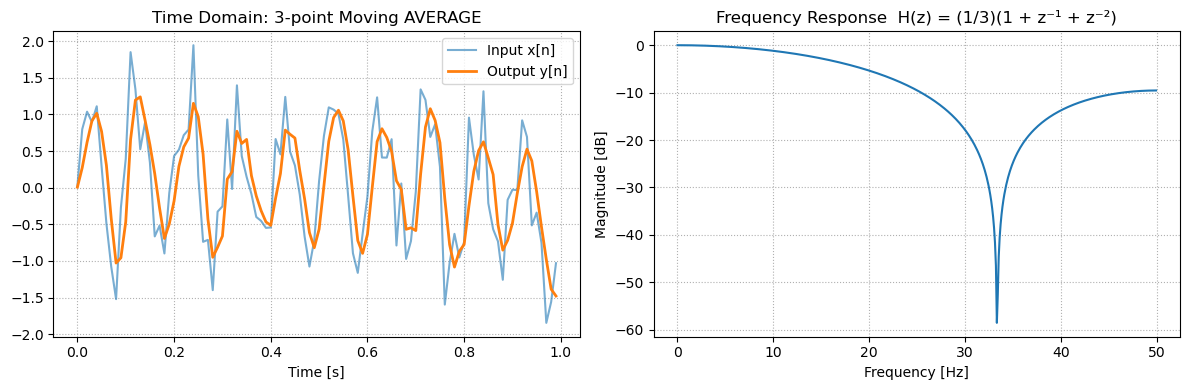

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# --- 3-point moving average ---
b = [1/3, 1/3, 1/3]  # numerator (average of 3)
a = [1.0]            # denominator

# Simulate noisy sine through filter
fs = 100
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))
y = signal.lfilter(b, a, x)

plt.figure(figsize=(12,4))

# Time domain
plt.subplot(1,2,1)
plt.plot(t, x, label='Input x[n]', alpha=0.6)
plt.plot(t, y, label='Output y[n]', linewidth=2)
plt.title('Time Domain: 3-point Moving AVERAGE')
plt.xlabel('Time [s]')
plt.legend(); plt.grid(True, linestyle=':')

# Frequency response
w, h = signal.freqz(b, a, worN=512)
f = (w/(2*np.pi))*fs
mag_db = 20*np.log10(np.maximum(np.abs(h), 1e-12))
plt.subplot(1,2,2)
plt.plot(f, mag_db)
plt.title('Frequency Response  H(z) = (1/3)(1 + z⁻¹ + z⁻²)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

## 4. Poles and Zeros
In general, a transfer function has the form:

$$
H(z) = \frac{b_0 + b_1 z^{-1} + \dots + b_M z^{-M}}{1 + a_1 z^{-1} + \dots + a_N z^{-N}}
$$

- **Zeros**: values of $z$ where $H(z) = 0$
- **Poles**: values of $z$ where $H(z) \to \infty$

**Importance:**
- Poles near the unit circle → resonances, stability issues.
- Zeros near the unit circle → frequency cancellations.

---

### 4.1 Pole–Zero Plot of the Moving Average Example

From the time-domain equation

$$
y[n] = x[n] + x[n-1]
$$

we derived the transfer function

$$
H(z) = 1 + z^{-1}
$$

Multiplying top and bottom by $z$:

$$
H(z) = \frac{z + 1}{z}
$$

- **Zero** = root of numerator → $z = -1$  
- **Pole** = root of denominator → $z = 0$  

So this system has:  
- a **zero** at $z = -1$, which lies on the unit circle at angle $\pi$ (it cancels alternating signals $+1, -1, +1, -1, \dots$),  
- a **pole** at $z = 0$, which just represents the delay operator and is not problematic for stability.  

---

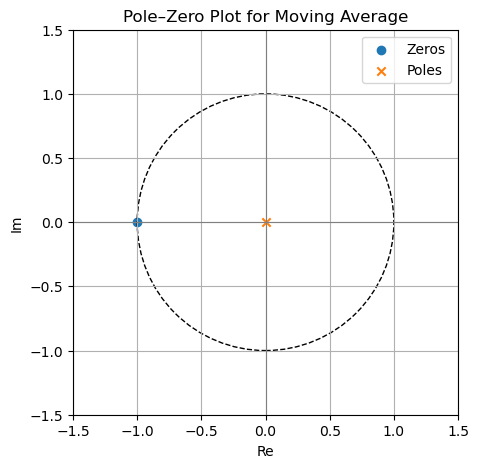

In [6]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# H(z) = (z + 1)/z
num = [1, 1]   # numerator polynomial (z + 1)
den = [1, 0]   # denominator polynomial (z)

z, p, k = signal.tf2zpk(num, den)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(np.real(z), np.imag(z), marker='o', label='Zeros')
ax.scatter(np.real(p), np.imag(p), marker='x', label='Poles')

# Unit circle
circle = plt.Circle((0,0), 1, color='black', fill=False, linestyle='--')
ax.add_artist(circle)

ax.axhline(0, color='gray', linewidth=0.8)
ax.axvline(0, color='gray', linewidth=0.8)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

ax.set_title("Pole–Zero Plot for Moving Average")
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.legend()
ax.grid(True)
plt.show()

### 4.2 How the Unit Circle Maps to Frequency Response

#### Traversing the Circle

- Start at $z = 1$ (rightmost point on the real axis).  
- As $\omega$ increases from $0$ to $\pi$, we move **counterclockwise** along the **upper half** of the circle.  
- At $\omega = \pi$, we reach $z = -1$ (leftmost point on real axis).  
- This covers all unique frequencies for real discrete-time signals.
- A full revolution ($0$ to $2\pi$) would give a **two-sided spectrum**

#### Frequency Axis Mapping

- $\omega = 0$ → DC (constant signals).  
- $\omega = \pi/2$ → quarter circle up, corresponds to $f = f_s/4$.  
- $\omega = \pi$ → Nyquist frequency $f = f_s/2$.  

Thus the **upper half of the unit circle** maps directly to the **frequency axis** of a discrete-time spectrum.


### 4.3 Radius and Transients
Remember, $z = r e^{j\omega}$:

- If $r < 1$, the oscillation decays → **damped transient**
- If $r = 1$, oscillation continues → **steady sinusoid**
- If $r > 1$, oscillation grows → **unstable**

So:
- **Poles inside unit circle** → stable system
- **Poles on unit circle** → sustained oscillation
- **Poles outside unit circle** → unstable system

This connects the radius $r$ to **transient behavior** in time domain.

### 4.4 Interactive Pole–Zero Playground

This demo lets you move system poles and zeros around in the z-plane.  
The frequency and phase response are recalculated each time, so you can see how locations on the z-plane affect the system behavior.

**Hints for exploration:**
- Place a zero near the unit circle at $\omega=\pi$ → it will notch out high-frequency signals.  
- Place a pole close to the unit circle → it will create a sharp resonance near that frequency.  
- Move poles inside, on, and outside the unit circle to see stability effects.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from ipywidgets import interact, FloatSlider

def pole_zero_polar(z_r=1.0, z_w=np.pi, p_r=0.0, p_w=0.0):
    # Convert polar form to complex location
    zero = z_r * np.exp(1j*z_w) if z_r > 0 else None
    pole = p_r * np.exp(1j*p_w) if p_r > 0 else None
    
    zeros = [zero] if zero is not None else []
    poles = [pole] if pole is not None else []
    k = 1.0
    
    # Convert to polynomial form
    b, a = signal.zpk2tf(zeros, poles, k)
    w, h = signal.freqz(b, a, worN=1024)
    
    fig, axs = plt.subplots(1, 3, figsize=(16,4))
    
    # Pole-zero plot
    ax = axs[0]
    if zeros: ax.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zero')
    if poles: ax.scatter(np.real(poles), np.imag(poles), marker='x', label='Pole')
    circle = plt.Circle((0,0), 1, color='black', fill=False, linestyle='--')
    ax.add_artist(circle)
    ax.axhline(0, color='gray', linewidth=0.8)
    ax.axvline(0, color='gray', linewidth=0.8)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_title("Pole–Zero Plot")
    ax.legend(); ax.grid()
    
    # Magnitude response
    axs[1].plot(w/np.pi, 20*np.log10(np.abs(h)+1e-12))
    axs[1].set_title("Magnitude Response")
    axs[1].set_xlabel("Normalized Frequency (×π rad/sample)")
    axs[1].set_ylabel("Magnitude [dB]")
    axs[1].set_ylim(-60, 10)
    axs[1].grid()
    
    # Phase response
    axs[2].plot(w/np.pi, np.unwrap(np.angle(h)))
    axs[2].set_title("Phase Response")
    axs[2].set_xlabel("Normalized Frequency (×π rad/sample)")
    axs[2].set_ylabel("Phase [radians]")
    axs[2].grid()
    
    plt.tight_layout()
    plt.show()

interact(
    pole_zero_polar,
    z_r=FloatSlider(min=0, max=1.5, step=0.1, value=1.0, description="Zero radius"),
    z_w=FloatSlider(min=0, max=np.pi, step=0.05, value=np.pi, description="Zero angle ω"),
    p_r=FloatSlider(min=0, max=1.5, step=0.1, value=0.0, description="Pole radius"),
    p_w=FloatSlider(min=0, max=np.pi, step=0.05, value=0.0, description="Pole angle ω"),
)

interactive(children=(FloatSlider(value=1.0, description='Zero radius', max=1.5), FloatSlider(value=3.14159265…

<function __main__.pole_zero_polar(z_r=1.0, z_w=3.141592653589793, p_r=0.0, p_w=0.0)>

#### Exercise 4.1
Use the pole–zero plot of the moving average filter.
Where is the zero?
What frequency does it cancel?

#### Answer
The zero is at z = −1 (on the unit circle, angle π).  
It cancels the Nyquist frequency (f = fs / 2).

## 5. From Poles and Zeros to Program Code

### 5.1. Transfer Function Representation
A digital filter is often described as a transfer function:

$$
H(z) = \frac{b_0 + b_1 z^{-1} + \dots + b_M z^{-M}}
           {1 + a_1 z^{-1} + \dots + a_N z^{-N}}
$$

- The **numerator polynomial** has roots = the **zeros** of the system.  
- The **denominator polynomial** has roots = the **poles** of the system.  
- The coefficients $(b_k, a_k)$ are just the expanded polynomial coefficients, and these are what we actually use in code (`lfilter`, etc.).  

This is called the **IIR filter difference equation**.
- T blocks represent a delay line ($z^-1$), i.e. a data buffer in code
- Left side represents the history of **filter input**
- Right side is the history of **filter output**

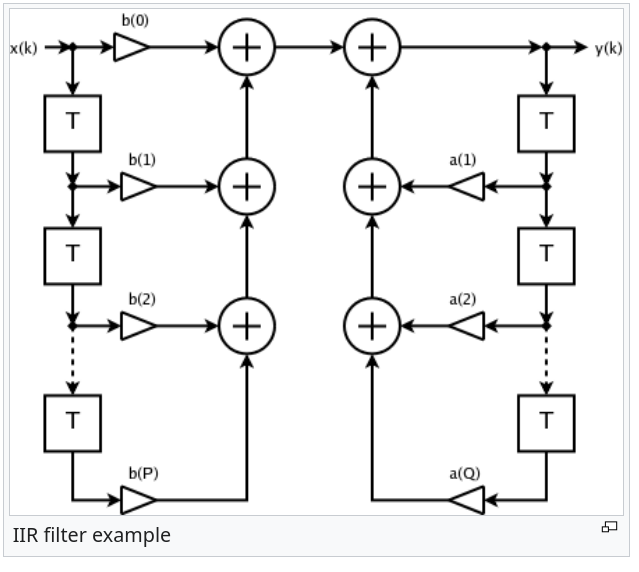


### 5.2. Real values, complex polynomial roots
In practice, we process **real-valued signals** and produce **real-valued outputs**. That means:  
- The filter implementation must use **real coefficients** \(a_k, b_k\).  
- These coefficients are what we actually store and use in code (e.g., in `lfilter`).  
But when we solve for the **roots** (poles and zeros) of the numerator and denominator polynomials, those roots can be **complex numbers**.  

So when we describe a digital filter as a transfer function, with coefficients $a_k, b_k$ in

$$
H(z) = \frac{b_0 + b_1 z^{-1} + \dots + b_M z^{-M}}
           {1 + a_1 z^{-1} + \dots + a_N z^{-N}}
$$

$a_k, b_k$ are **real numbers** so that it can be implemented in code.

But when we solve for the **roots** of numerator and denominator polynomials (poles and zeros) for analysis, those roots can be complex. But remember a fundamental fact from algebra:  
- A polynomial of degree $n$ has exactly $n$ roots (counting multiplicities). 
- These roots may be real or complex. 
- If the polynomial has real coefficients, any complex roots always appear as conjugate pairs.
     - If $z_0 = r e^{j\omega}$ is a root,  
     - Then $z_0^* = r e^{-j\omega}$ is also a root.  
     This ensures that when you multiply out the factors, the imaginary parts cancel, leaving **real coefficients**.

---

### 5.3. Geometric meaning
- Each complex-conjugate pair corresponds to a **resonance at frequency $\omega$**.  
- The radius $r$ controls how sharp or damped the resonance is.  

So even though the poles/zeros are complex, the **filter behavior is real-valued** and stable for real signals.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from ipywidgets import interact, FloatSlider

def pole_zero_realizable(z_r=1.0, z_w=np.pi, p_r=0.0, p_w=0.0):
    zeros, poles = [], []

    # Zero (and its conjugate if nonzero angle)
    if z_r > 0:
        z = z_r * np.exp(1j*z_w)
        zeros.append(z)
        if z_w > 0 and z_w < np.pi:  # avoid double-adding real axis
            zeros.append(np.conj(z))

    # Pole (and its conjugate if nonzero angle)
    if p_r > 0:
        p = p_r * np.exp(1j*p_w)
        poles.append(p)
        if p_w > 0 and p_w < np.pi:
            poles.append(np.conj(p))

    # Convert to transfer function coefficients
    b, a = signal.zpk2tf(zeros, poles, 1.0)
    w, h = signal.freqz(b, a, worN=1024)

    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    # Pole–zero plot
    ax = axs[0]
    if zeros: ax.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
    if poles: ax.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
    circle = plt.Circle((0,0), 1, color='black', fill=False, linestyle='--')
    ax.add_artist(circle)
    ax.axhline(0, color='gray', linewidth=0.8)
    ax.axvline(0, color='gray', linewidth=0.8)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_title("Pole–Zero Plot (Realizable)")
    ax.legend(); ax.grid()

    # Magnitude response
    axs[1].plot(w/np.pi, 20*np.log10(np.abs(h)+1e-12))
    axs[1].set_title("Magnitude Response")
    axs[1].set_xlabel("Normalized Frequency (×π rad/sample)")
    axs[1].set_ylabel("Magnitude [dB]")
    axs[1].set_ylim(-60, 10)
    axs[1].grid()

    # Phase response
    axs[2].plot(w/np.pi, np.angle(h))
    axs[2].set_title("Phase Response")
    axs[2].set_xlabel("Normalized Frequency (×π rad/sample)")
    axs[2].set_ylabel("Phase [rad]")
    axs[2].set_ylim(-np.pi, np.pi)
    axs[2].grid()

    plt.tight_layout()
    plt.show()

interact(
    pole_zero_realizable,
    z_r=FloatSlider(min=0, max=1.5, step=0.1, value=1.0, description="Zero radius"),
    z_w=FloatSlider(min=0, max=np.pi, step=0.05, value=np.pi, description="Zero angle ω"),
    p_r=FloatSlider(min=0, max=1.5, step=0.1, value=0.0, description="Pole radius"),
    p_w=FloatSlider(min=0, max=np.pi, step=0.05, value=0.0, description="Pole angle ω"),
)

interactive(children=(FloatSlider(value=1.0, description='Zero radius', max=1.5), FloatSlider(value=3.14159265…

<function __main__.pole_zero_realizable(z_r=1.0, z_w=3.141592653589793, p_r=0.0, p_w=0.0)>

## 6. Summary
- **Integral transforms** convert complex time-domain equations into simpler algebraic forms.  
  - **Laplace transform**: Differential equations → algebraic in `s`.  
  - **Z-transform**: Difference equations → algebraic in `z`.  
  - **Fourier transform**: Signal representation in terms of sinusoidal base functions (frequency-domain analysis).  
  - Purpose: Makes analysis and design of systems much easier than working directly in the time domain.  
- **Transfer function** describes system behavior in the Z-domain (discrete) or Laplace domain (continuous).  
  - When expressed as polynomials in **`z⁻¹`** → gives **filter coefficients** (`b` for numerator, `a` for denominator).  
  - When expressed as polynomials in **`z`** → reveals **poles and zeros**, useful for stability and frequency response analysis.  
- Sensor signals are real numbers: the processing must take real numbers in and output real numbers -> all complex valued poles and zeros in filter must have **conjugate pairs** in order to be realizable 

#### Exercise 6.1
Fill in the table:

| Transform   | Domain    | Handles transients? | Discrete or Continuous? | Main use                                          |
| ----------- | --------- | ------------------- | ----------------------- | ------------------------------------------------- |
| Fourier     | Frequency | No                  | Both                    | steady-state frequency analysis                   |
| Laplace     | s-domain  | Yes                 | Continuous              | control systems, analog/RF electronics            |
| Z-transform | z-domain  | Yes                 | Discrete                | digital control systems and DSP (digital filters) |